In [1]:
# Load important libaries
import numpy as np  #for numerical purpose

import pandas as pd #for analysis purpose

#visulaization purpose
import matplotlib.pyplot as plt
import seaborn as sns

# remove unnessary warnings
import warnings
warnings.filterwarnings('ignore')

In [83]:
# diffrent classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

In [84]:
# loaded diffrent type model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [85]:
# loaded diffrent algorithms
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score,balanced_accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [2]:
#load adult dataset
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Basic Analysis

In [3]:
#check shape of dataset
df.shape

(768, 9)

In this dataset we have 768 rows and 9 columns

In [4]:
# Getting information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Information About Dataset

1. In this dataset we have 9 columns and 768 rows.

2. Out of 9 columns 7 columns are int type data and other 2 are float type dataset.

3. In this dataset we have not null values.

In [5]:
# Check null values 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

As we see that here not present null values in this dataset

In [6]:
#check white spaces
df.loc[df['Outcome'] == " "]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Here not present white space so our data is free from null values and white spaces

In [7]:
# check duplicate values
df.duplicated().sum()

0

Here no duplicated values are present in this dataset

In [8]:
# Check unique values 
df.nunique().to_frame('No. Of Unique Values')

,No. Of Unique Values
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DiabetesPedigreeFunction,517
Age,52
Outcome,2


## Exploratory Data Analysis

### 1. Uni-varient Analysis

<AxesSubplot: xlabel='Pregnancies', ylabel='Count'>

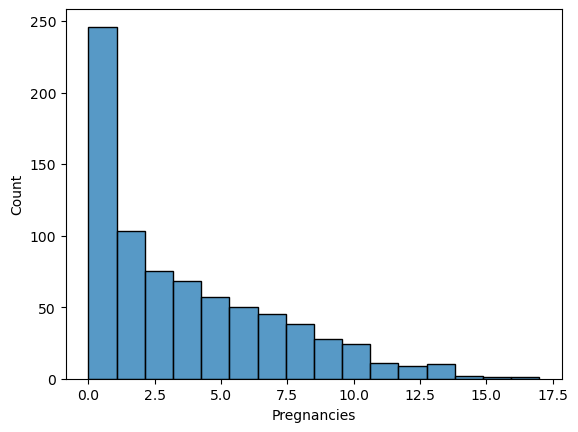

In [9]:
# univarient analysis of Pregnancies
sns.histplot(df['Pregnancies'])

1. As we see, the pregnancies column has min values of 0 and max values of 17.

2. Chances of diabetes in Pregnant lady varies from o to any week and month. Here No specific Criteria for diabetes happen
to pregnant lady.

<AxesSubplot: xlabel='Glucose', ylabel='Count'>

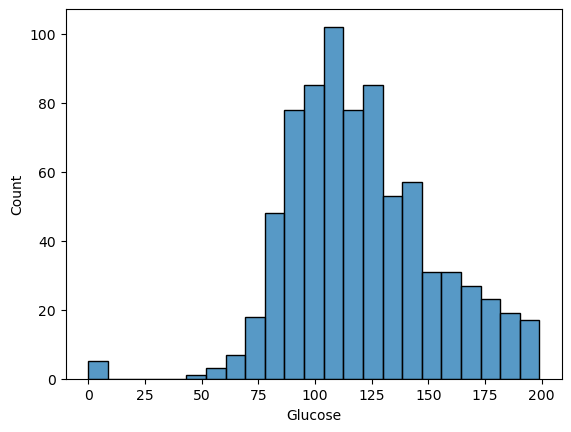

In [10]:
# univarient analysis of glouse
sns.histplot(df.Glucose)

1. In glucose, the min value is 0 and the max value is 200.

2. As we know that in any human body glucose level is not near to value 0. So we change it later by its mean values for better accuracy.

<AxesSubplot: xlabel='BloodPressure', ylabel='Count'>

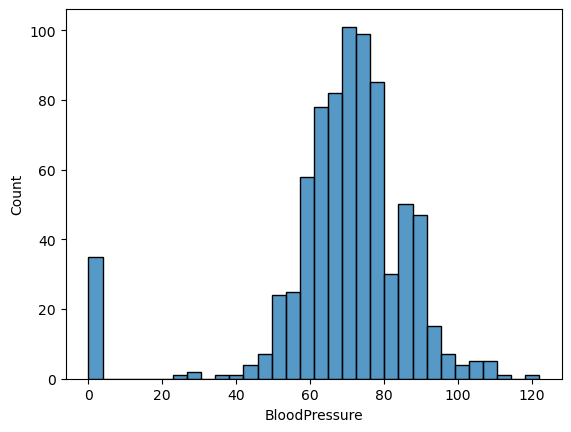

In [11]:
# univarient analysis of Blood Pressure
sns.histplot(df['BloodPressure'])

1. Here In Blood Pressure min value is 0 and the max value is 122.

2. As we know that in humans lowest blood pressure is near 60 and the max is 120. But here lowest value is varying near 0 to 60. so we change below 60's values later with its mean value.

<AxesSubplot: xlabel='SkinThickness', ylabel='Count'>

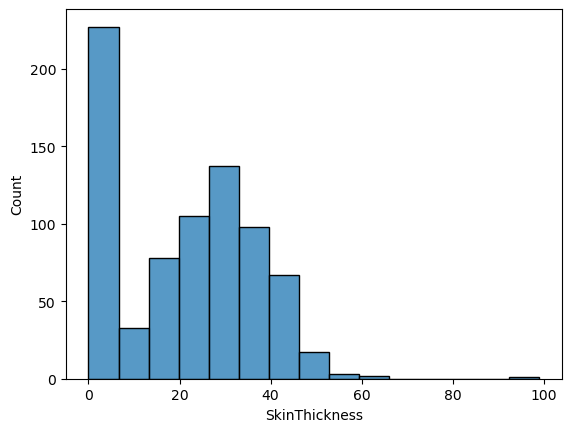

In [12]:
# univarient analysis of Skin Thickness
sns.histplot(df['SkinThickness'])

1. Here In Skin Thickness min value is 0 and the max value is 99.

2. As we know that in the humans body some thicknesses are present so this value is never equal to zero. so we change later with its mean values.

<AxesSubplot: xlabel='Insulin', ylabel='Count'>

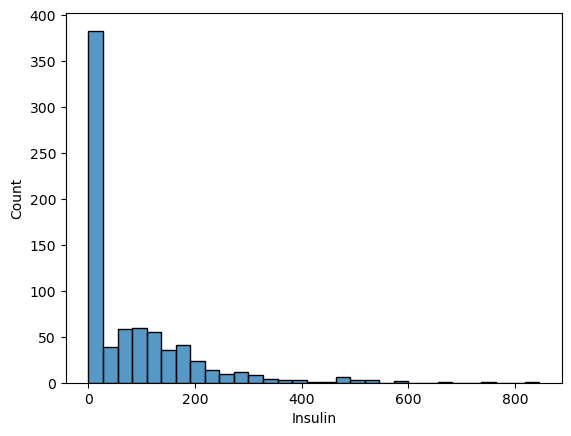

In [13]:
# univarient analysis of Insulin
sns.histplot(df['Insulin'])

Here in Insulin min value is 0 and max value is near 800

<AxesSubplot: xlabel='BMI', ylabel='Count'>

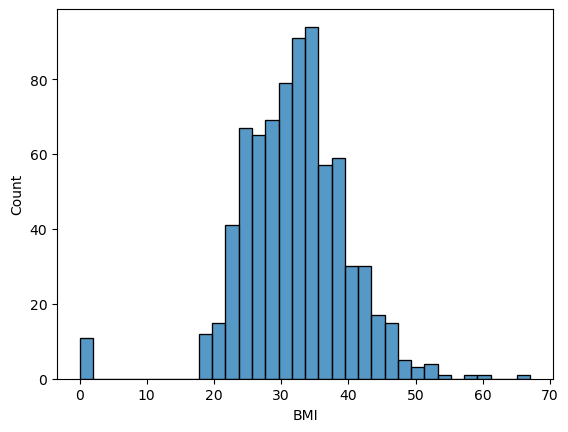

In [14]:
# univarient analysis of BMI
sns.histplot(df['BMI'])

1. Here in BMI min value is 0 and the max value is near 68.

2. As we know that BMI is never equal to 0. But the lowest good BMI is near 18 so we change all values which is less than 18 by its mean values

<AxesSubplot: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

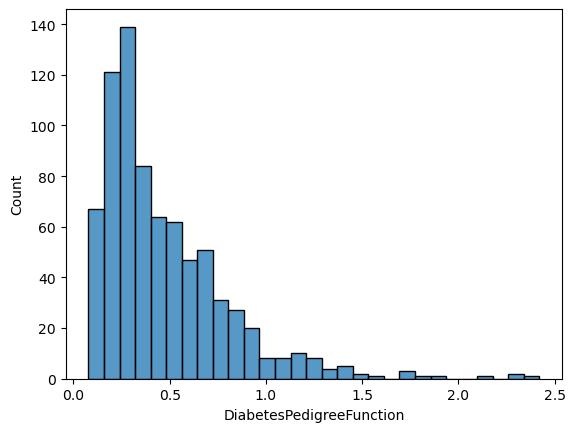

In [15]:
# univarient analysis of DiabetesPedigreeFunction
sns.histplot(df.DiabetesPedigreeFunction)

Here in Diabetes Pedigree Function min values is 0.078 and max values is near 2.42

<AxesSubplot: xlabel='Age', ylabel='Count'>

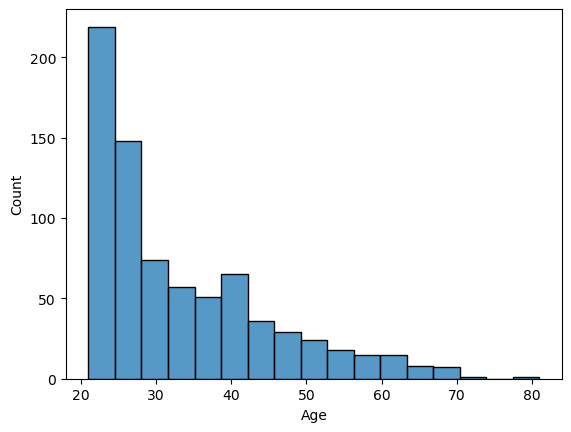

In [16]:
# univarient anlysis of age
sns.histplot(df.Age)

1. Here in Age min values is near 21 and max values is near 81.

2. As we know that here no specifics criteria for diabetes for a particular age person.

### 2. Bi-Varient Analysis

<AxesSubplot: xlabel='Pregnancies', ylabel='Outcome'>

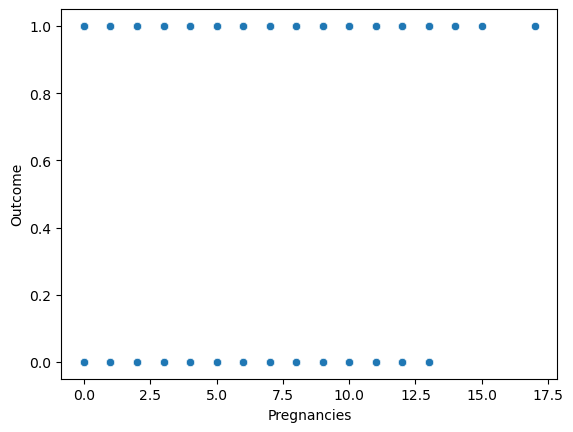

In [17]:
# bivarient anlysis of pregnancies with target outcome
sns.scatterplot(x= df.Pregnancies, y = df.Outcome)

By this graph, we clearly understand that after 12.5 values increase diabetes chances also increase

<AxesSubplot: xlabel='Glucose', ylabel='Outcome'>

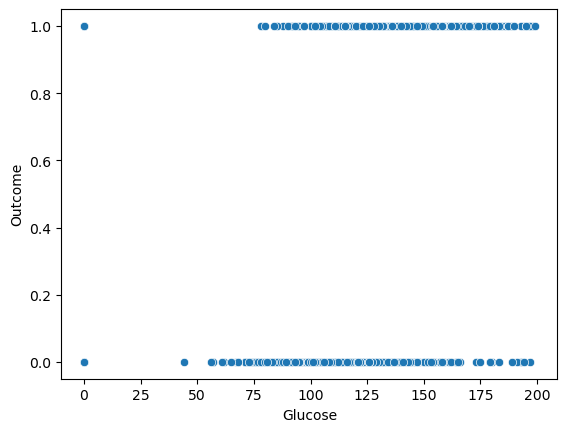

In [18]:
# bivarient analysis of Glucose and target outcome
sns.scatterplot(x=df.Glucose, y=df.Outcome)

As we see that as Glucose level increase with this diabetes level also increases

<AxesSubplot: xlabel='BloodPressure', ylabel='Outcome'>

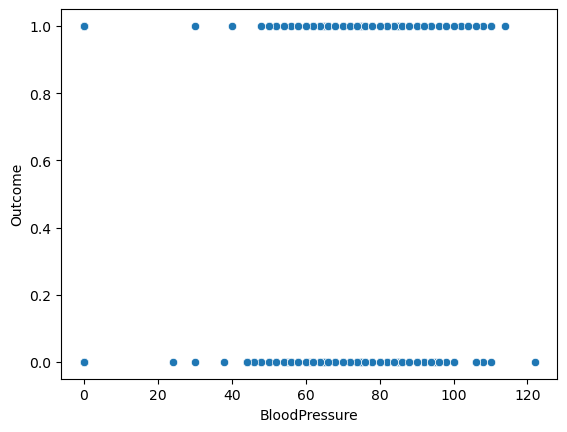

In [19]:
# bivarient analysis of BloodPressure
sns.scatterplot(x= df.BloodPressure, y= df.Outcome)

As bp increases diabetes levels also increase.

<AxesSubplot: xlabel='SkinThickness', ylabel='Outcome'>

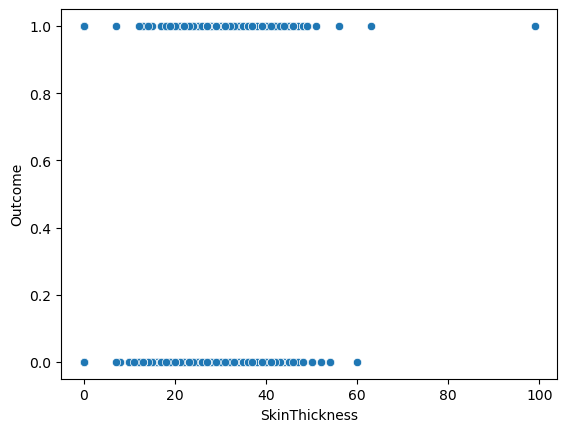

In [20]:
# bivarient analysis of SkinThickness
sns.scatterplot(x=df.SkinThickness, y= df.Outcome)

after SkinThickness value 60, diabetes increases chances are more

<AxesSubplot: xlabel='Insulin', ylabel='Outcome'>

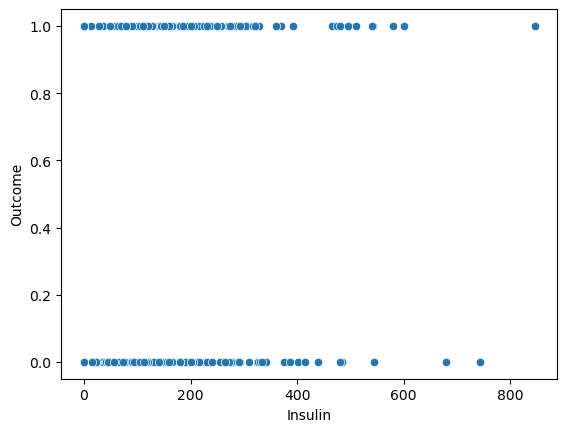

In [21]:
# bivarient analysis of Insulin
sns.scatterplot(x=df.Insulin, y = df.Outcome)

after the Insulin level cross 600 values than diabetes happen chances are more.

<AxesSubplot: xlabel='BMI', ylabel='Outcome'>

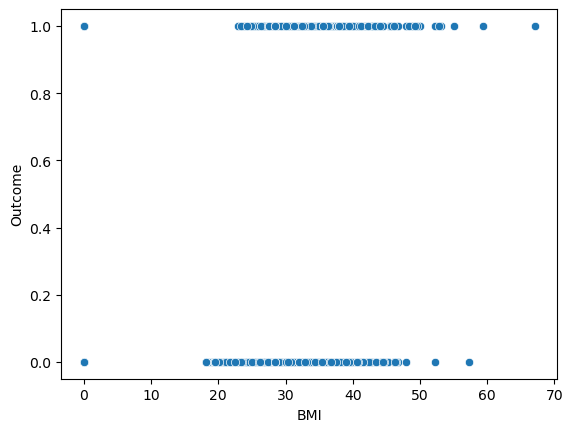

In [22]:
# bivarient analysis of BMI
sns.scatterplot(x=df.BMI, y=df.Outcome)

After BMI values increase 60 values diabetes values also incraese.

<AxesSubplot: xlabel='DiabetesPedigreeFunction', ylabel='Outcome'>

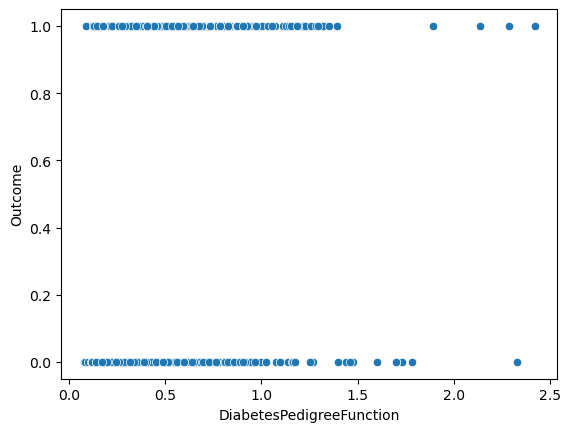

In [23]:
# bivarient analysis of DiabetesPedigreeFunction
sns.scatterplot(x=df.DiabetesPedigreeFunction, y= df.Outcome)

When Diabetes Pedigree Function cross values 1.8 then diabetes chances also increase

<AxesSubplot: xlabel='Age', ylabel='Outcome'>

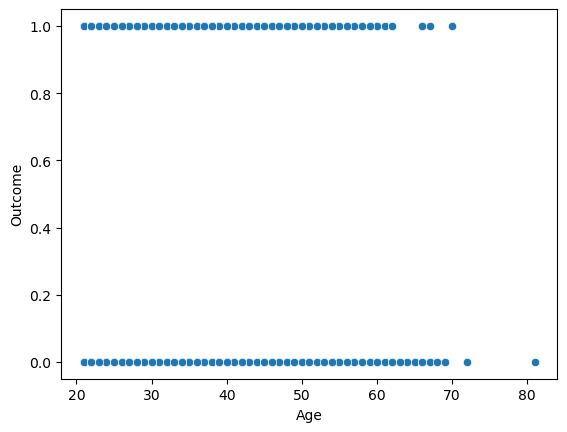

In [24]:
# bivarient analysis of Age
sns.scatterplot(x= df.Age, y= df.Outcome)

After age 70 diabetes chances also incresae

### 3. Data Preparation For Further Analysis

In [25]:
# As we know that Minimum level of glucose in humans body is 70 so we change all below 70 values with its upper median values.
val = df['Glucose'] < 70
val1 = df['Glucose'] > 70
median = df['Glucose'][val1].median()
df['Glucose1'] = df['Glucose']
df['Glucose1'][val] = median
val3=df['Glucose1'].min()
print(f"Minimum Value of Glucose is {val3}")

Minimum Value of Glucose is 71


In [26]:
# As we know that there is skin present in human body so we change its minimum value 0 to its minimum value
val = df['SkinThickness'] < 7
val1 = df['SkinThickness'] >7
median = df['SkinThickness'][val1].median()
df['SkinThickness1'] = df['SkinThickness']
df['SkinThickness1'][val] = median
val3=df['SkinThickness1'].min()
print(f"Minimum Value of SkinThickness1 is {val3}")

Minimum Value of SkinThickness1 is 7


In [27]:
#As we know that minimum value of BMI in humans is more than 18 so we convert all values below 18 by its median value
val = df['BMI'] < 18
val1 = df['BMI'] > 18
median = df['BMI'][val1].median()
df['BMI1'] = df['BMI']
df['BMI1'][val] = median
val3=df['BMI1'].min()
print(f"Minimum Value of BMI is {val3}")

Minimum Value of BMI is 18.2


In [28]:
#As we know that minimum value of BP in humans is more than  so we convert all values below 18 by its median value
val = df['BloodPressure'] < 60
val1 = df['BloodPressure'] > 60
median = df['BloodPressure'][val1].median()
df['BloodPressure1'] = df['BloodPressure']
df['BloodPressure1'][val] = median
val3=df['BloodPressure1'].min()
print(f"Minimum Value of BP is {val3}")

Minimum Value of BP is 60


### 4. Describe Statistic Of Dataset

In [29]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose1,SkinThickness1,BMI1,BloodPressure1
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,122.476562,29.108073,32.455208,74.923177
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,29.543056,8.791221,6.875177,9.475727
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,71.000000,7.000000,18.200000,60.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,100.000000,25.000000,27.500000,68.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,118.000000,29.000000,32.300000,74.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,140.250000,32.000000,36.600000,80.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,199.000000,99.000000,67.100000,122.000000


As we know that if diffrence between mean and std is more than outliers are present so we analysis all outliers and skewness in dataset
through visulization

### 5. Skewness Through Visualization

In [30]:
col = df.drop('Outcome', axis=1).columns

In [31]:
col

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Glucose1', 'SkinThickness1',
       'BMI1', 'BloodPressure1'],
      dtype='object')

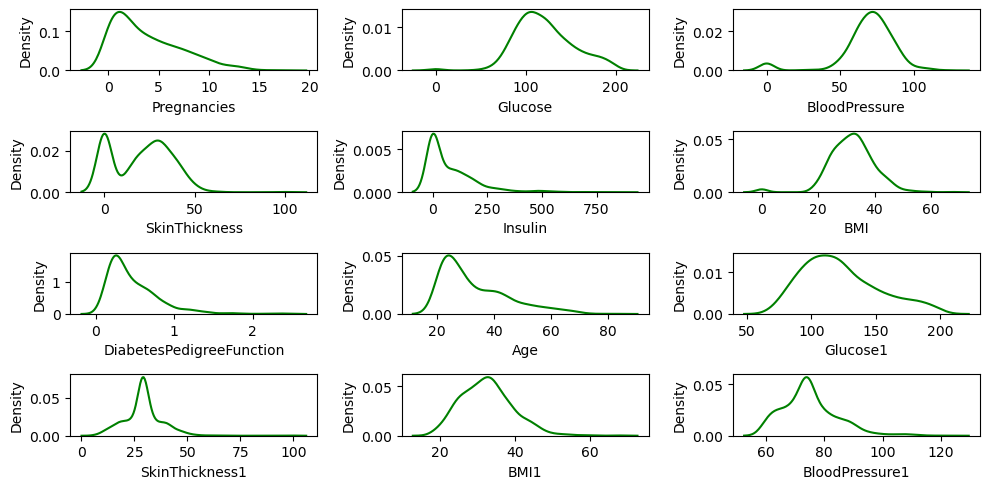

In [32]:
#Skewness all variable except target variable outcome
plt.figure(figsize=(10,5))
for i in range(len(col)):
    ax=plt.subplot(4,3,i+1)
    sns.kdeplot(df[col[i]],color='green')
    plt.tight_layout()

#### Skewness in dataset -->

1. In Pregnancies Skewness are present on the left side means mean > median.

2. In Glucose Skewness are present on the right side means median > mean.

3. In BP Skewness is present in the middle means mean = median (approx).

4. In Skin Thickness Skewness are present on the left side means mean> median.

5. In Insulin Skewness is present on the left side means mean > median.

6. In BMI Skewness is present in middle means mean = median (approx).

7. In the Diabetes Pedigree function Skewness is present on the left side means mean > median.

8. In Age Skewness is present in the left side mean> median.

9. In Glucose1 Skewness is not present means mean = median (approx).

10. In SkinThickness1 Skewness present in left side means mean > median.

12. In BMI1 Skewness present in left side means mean > median.

13. In BloodPressure1 Skewness present in ledt side means mean > median.

### 5. Outliers Through Visualization

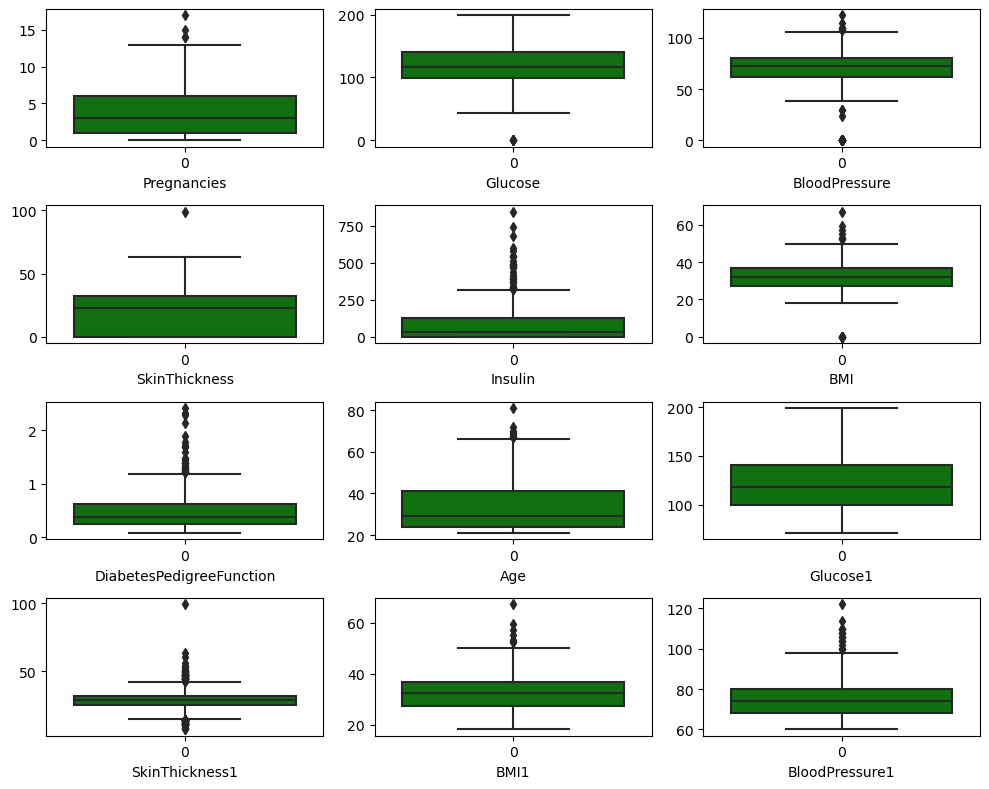

In [33]:
# outliers except target varible outcome
plt.figure(figsize=(10,8))
for i in range(len(col)):
    ax=plt.subplot(4,3,i+1)
    sns.boxplot(df[col[i]],color='green')
    plt.xlabel(col[i], fontsize = 10)
    plt.tight_layout()

#### outliers in the dataset -->

1. In Pregnancy Outliers are present.

2. In Glucose Outliers are not present.

3. In BP Outliers are present.

4. In Skin Thickness Outliers are not present.

5. In Insulin Outliers are present.

6. In BMI Outliers are present.

7. In Diabetes Pedigree Function Outliers are present.

8. In Age outliers are present.

9. In Glucose1 outliers are not present.

10. In SkinThickness1 outliers are presnt

11. In BMI1 outliers are present.

12. In BloodPressure1 outliers are present.

### 6. Correlation Between dataset

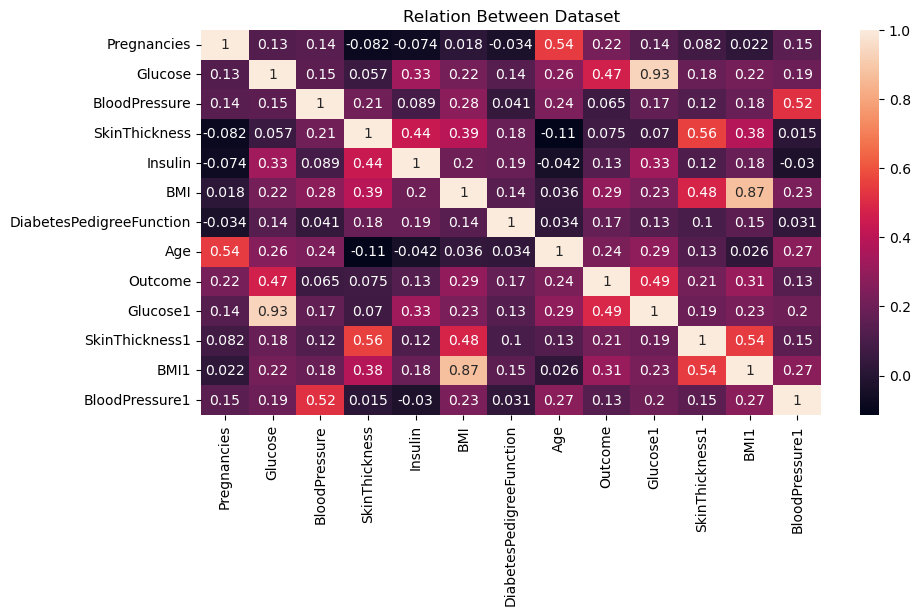

In [34]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot = True)
plt.title('Relation Between Dataset')
plt.show()

#### Correlation Between dataset -->

1. Pregnancies Correlated with target column outcome with 22%. It look like  bond.
2. Glucose Correlated with target column outcome with 47%. It look like  bond.
3. Blood Pressure Correlated with target column outcome with 6.5%. It look like  bond.
4. Skin Thickness Correlated with target column outcome with 7.5%. It look like  bond.
5. Insulin Correlated with target column outcome with 13%. It look like  bond.
6. BMI Correlated with target column outcome with 29%. It look like  bond.
7. Diabetes Pedigree Function Correlated with target column outcome with 17%. It look like  bond.
8. Age Correlated with target column outcome with 24%. It look like  bond.
9. Glocose1 Correlated with target column outcome with 49%. It look like  bond.
10. Skin Thickness1 Correlated with target column outcome with 21%. It look like  bond.
11. BMI1 Correlated with target column outcome with 31%. It look like  bond.
12. Blood Pressure1 Correlated with target column outcome with 13%. It look like  bond.

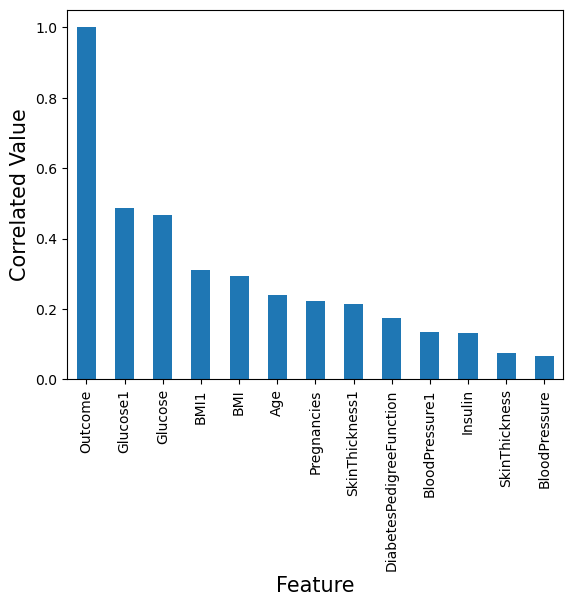

In [39]:
# analyis through outcome correlation through bar chart
df.corr()['Outcome'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Correlated Value', fontsize=15)
plt.show()

Here all columns have good bonding with target columns 

### 7. Data Cleaning

In [40]:
#here we created some new features so we remove all their previous features
df.drop(['Glucose','BMI','SkinThickness','BloodPressure'],axis=1, inplace=True)

In [41]:
df

,Pregnancies,Insulin,DiabetesPedigreeFunction,Age,Outcome,Glucose1,SkinThickness1,BMI1,BloodPressure1
0,6,0,0.627,50,1,148,35,33.6,72
1,1,0,0.351,31,0,85,29,26.6,66
2,8,0,0.672,32,1,183,29,23.3,64
3,1,94,0.167,21,0,89,23,28.1,66
4,0,168,2.288,33,1,137,35,43.1,74
...,...,...,...,...,...,...,...,...,...
763,10,180,0.171,63,0,101,48,32.9,76
764,2,0,0.340,27,0,122,27,36.8,70
765,5,112,0.245,30,0,121,23,26.2,72
766,1,0,0.349,47,1,126,29,30.1,60


### 8. Outliers

In [42]:
# check outliers in this dataset features
from scipy.stats import zscore

In [49]:
(zscore(df)>3).any()

Pregnancies                  True
Insulin                      True
DiabetesPedigreeFunction     True
Age                          True
Outcome                     False
Glucose1                    False
SkinThickness1               True
BMI1                         True
BloodPressure1               True
dtype: bool

In this dataset except for Outcome and Glucose1, outliers are present in all dataset features

In [50]:
# create a function for remiving outliers
def remove_outliers(i):
    sorted(i)
    q1,q3=i.quantile([0.25,0.75])
    iqr=q3-q1
    lower_range=q1-(1.5*iqr)
    higher_range=q3+(1.5*iqr)
    return lower_range,higher_range

In [51]:
for x in df.columns:
    lower, upper= remove_outliers(df[x])
    df[x] = np.where(df[x]>upper,upper,df[x])
    df[x] = np.where(df[x]<lower,lower,df[x])
    

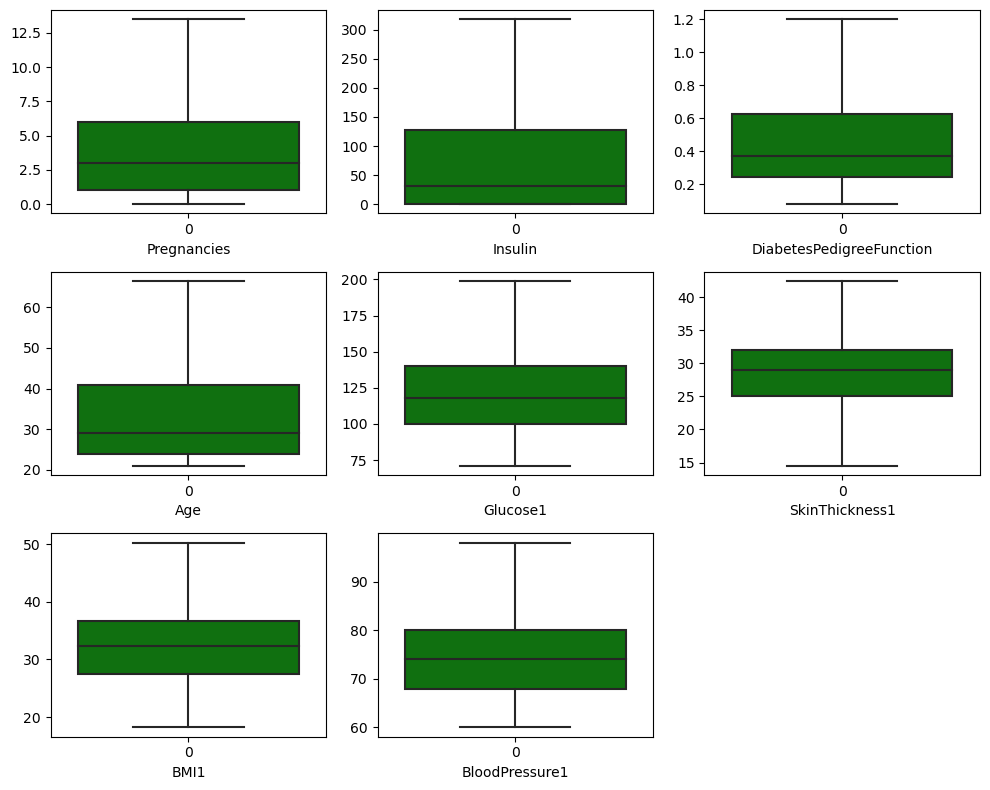

In [55]:
# outliers except target varible outcome
col = df.drop('Outcome', axis=1).columns
plt.figure(figsize=(10,8))
for i in range(len(col)):
    ax=plt.subplot(3,3,i+1)
    sns.boxplot(df[col[i]],color='green')
    plt.xlabel(col[i], fontsize = 10)
    plt.tight_layout()

In [58]:
# Now check outliers again
(zscore(df)>3).all()

Pregnancies                 False
Insulin                     False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
Glucose1                    False
SkinThickness1              False
BMI1                        False
BloodPressure1              False
dtype: bool

### 9.Skewness

In [59]:
# check skewness in this dataset
df.skew()

Pregnancies                 0.853962
Insulin                     1.173898
DiabetesPedigreeFunction    1.024428
Age                         1.067170
Outcome                     0.635017
Glucose1                    0.630775
SkinThickness1             -0.057643
BMI1                        0.349882
BloodPressure1              0.537541
dtype: float64

#### If we take a threshold value = 0.5 then skewness

1. Pregnancies

2. Insulin

3. Diabetes Pedigree Function

4. Age

5. Glucose1

6. Blood Pressure1

### Remove Skewness

In [61]:
from sklearn.preprocessing import power_transform

In [62]:
df1 = power_transform(df)

In [64]:
# check type
type(df1)

numpy.ndarray

In [65]:
# change into frame
df2=pd.DataFrame(df1,columns=df.columns)
df2.skew()

Pregnancies                -0.046789
Insulin                     0.037553
DiabetesPedigreeFunction    0.132241
Age                         0.149041
Outcome                     0.635017
Glucose1                    0.014890
SkinThickness1             -0.040931
BMI1                       -0.006893
BloodPressure1              0.012811
dtype: float64

As we see that all values come under threshold value 0.5, so we remove maximum skewness from the dataset

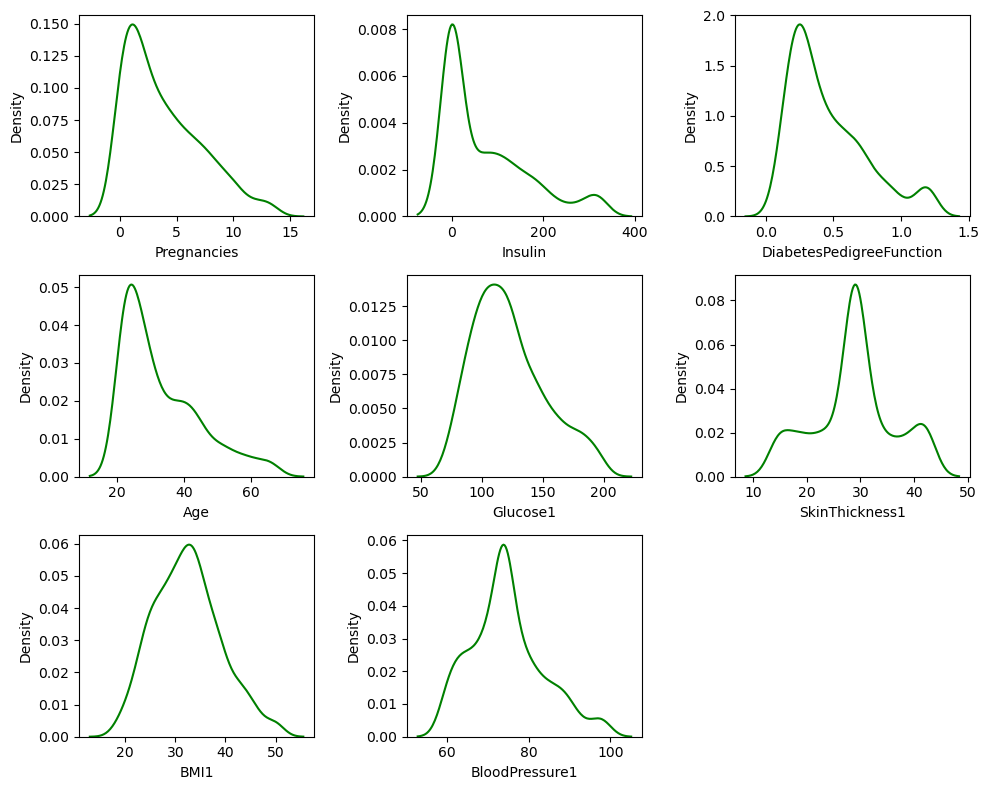

In [66]:
# skewness except target varible outcome
col = df.drop('Outcome', axis=1).columns
plt.figure(figsize=(10,8))
for i in range(len(col)):
    ax=plt.subplot(3,3,i+1)
    sns.kdeplot(df[col[i]],color='green')
    plt.xlabel(col[i], fontsize = 10)
    plt.tight_layout()

### 10. MultiColoniolity

In [67]:
#remove multicolonility
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variable'] = x.columns
    vif['Feature']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return (vif)

In [69]:
calc_vif(df2)

,variable,Feature
0,Pregnancies,1.581994
1,Insulin,1.127229
2,DiabetesPedigreeFunction,1.095816
3,Age,1.855778
4,Outcome,1.469407
5,Glucose1,1.406817
6,SkinThickness1,1.493006
7,BMI1,1.663190
8,BloodPressure1,1.170026


Here no major multicolnility in this datset

### 11. Split Both Independent And Target Variable

In [73]:
x = df.drop(['Outcome'],axis=1)

In [74]:
y=df['Outcome']

### 12. Balancing Dataset Target Column

In [71]:
df['Outcome'].value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

Here In yes and no variable diffrence is present so first of all we do equal both parameter

### SMOTE METHOD

In [75]:
!pip install -U imbalanced-learn


     -------------------------------------- 235.6/235.6 kB 7.0 MB/s eta 0:00:00


In [76]:
from imblearn.over_sampling import SMOTE

In [77]:
# apply smote method for balancibg target
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [78]:
y.value_counts()

1.0    500
0.0    500
Name: Outcome, dtype: int64

### 13. Standard Scaler

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
# apply min max scaler
st=MinMaxScaler()
x=st.fit_transform(x)
x

array([[0.44444444, 0.        , 0.48930481, ..., 0.73214286, 0.48049922,
        0.31578947],
       [0.07407407, 0.        , 0.24331551, ..., 0.51785714, 0.26209048,
        0.15789474],
       [0.59259259, 0.        , 0.52941176, ..., 0.51785714, 0.15912637,
        0.10526316],
       ...,
       [0.66600951, 0.        , 0.20023948, ..., 0.51785714, 0.38081439,
        0.73684211],
       [0.42937884, 0.        , 0.6343062 , ..., 0.57996372, 0.42925523,
        0.6468332 ],
       [0.02720727, 0.        , 0.43240565, ..., 0.51785714, 0.49150831,
        0.36842105]])

# Modeling Method

In [86]:
# Creating instances for different Classifiers
LO= LogisticRegression()
GA= GaussianNB()
MU= MultinomialNB()
BA= BernoulliNB()
KN= KNeighborsClassifier()
SV= SVC()
DT= DecisionTreeClassifier()
AD= AdaBoostClassifier()
GR= GradientBoostingClassifier()
RF= RandomForestClassifier()
XG= xgb.XGBClassifier(objective="reg:linear", random_state=42)

# Creating a list model where all the models will be appended for further evaluation in loop.
models=[]
models.append(('LogisticRegression',LO))
models.append(('MultinomialNB',MU))
models.append(('GaussianNB',GA))
models.append(('Bernoulli',BA))
models.append(('DecisionTreeClassifier',DT))
models.append(('KneighborsClassifier',KN))
models.append(('AdaBoostClassifier',AD))
models.append(('GradientBoostingClassifier',GR))
models.append(('RandomForestClassifier',RF))
models.append(('XGBClassifier',XG))

****************************** LogisticRegression ******************************
The maximum accuracy score of LogisticRegression is 0.7925 is achieved at 34




Accuracy_Score:  76.5


Accuracy Score of Model  : 76.16666666666667


AUC_Score: 76.54265426542655


Cross Validation Score:  75.9


Precision Score: 79.34782608695652


Recall_Score:  72.27722772277228


Balanced Accuracy_Score:  76.54265426542655


F1 Score:  75.64766839378238


Confusion matrix: 

[[160  38]
 [ 56 146]]


Classification Report:
 
              precision    recall  f1-score   support

         0.0       0.74      0.81      0.77       198
         1.0       0.79      0.72      0.76       202

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.76       400
weighted avg       0.77      0.77      0.76       400



<Figure size 500x500 with 0 Axes>

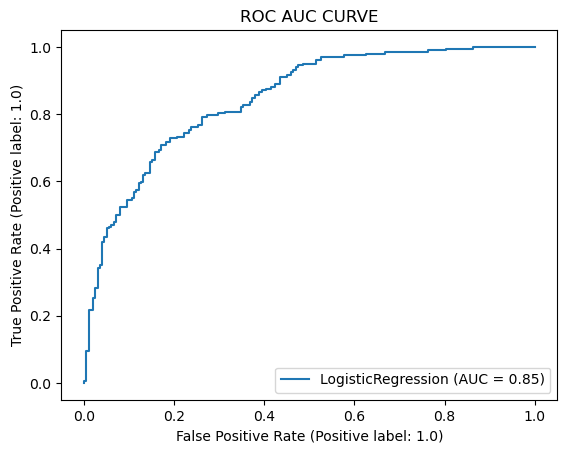





****************************** MultinomialNB ******************************
The maximum accuracy score of MultinomialNB is 0.625 is achieved at 39




Accuracy_Score:  62.5


Accuracy Score of Model  : 61.66666666666667


AUC_Score: 62.611261126112616


Cross Validation Score:  60.699999999999996


Precision Score: 66.66666666666666


Recall_Score:  51.48514851485149


Balanced Accuracy_Score:  62.611261126112616


F1 Score:  58.10055865921788


Confusion matrix: 

[[146  52]
 [ 98 104]]


Classification Report:
 
              precision    recall  f1-score   support

         0.0       0.60      0.74      0.66       198
         1.0       0.67      0.51      0.58       202

    accuracy                           0.62       400
   macro avg       0.63      0.63      0.62       400
weighted avg       0.63      0.62      0.62       400



<Figure size 500x500 with 0 Axes>

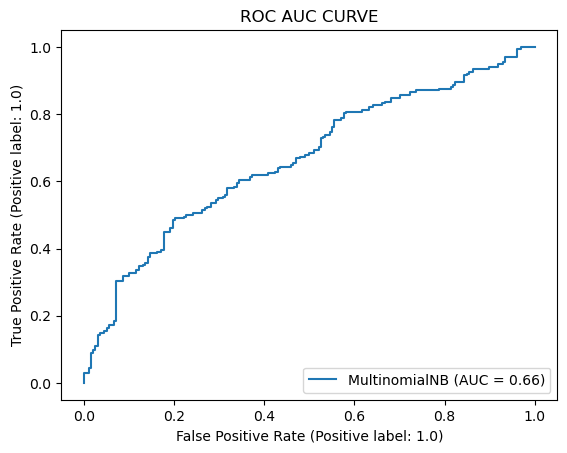





****************************** GaussianNB ******************************
The maximum accuracy score of GaussianNB is 0.7725 is achieved at 34




Accuracy_Score:  74.0


Accuracy Score of Model  : 74.33333333333333


AUC_Score: 74.02240224022403


Cross Validation Score:  73.5


Precision Score: 75.52083333333334


Recall_Score:  71.78217821782178


Balanced Accuracy_Score:  74.02240224022403


F1 Score:  73.6040609137056


Confusion matrix: 

[[151  47]
 [ 57 145]]


Classification Report:
 
              precision    recall  f1-score   support

         0.0       0.73      0.76      0.74       198
         1.0       0.76      0.72      0.74       202

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400



<Figure size 500x500 with 0 Axes>

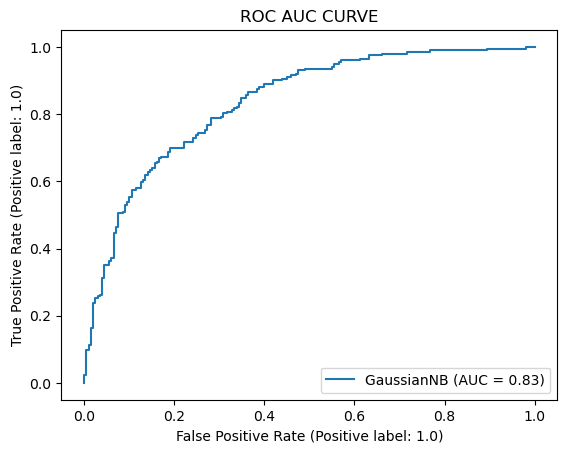





****************************** Bernoulli ******************************
The maximum accuracy score of Bernoulli is 0.6525 is achieved at 21




Accuracy_Score:  59.0


Accuracy Score of Model  : 62.0


AUC_Score: 58.69586958695869


Cross Validation Score:  60.8


Precision Score: 55.90062111801242


Recall_Score:  89.10891089108911


Balanced Accuracy_Score:  58.69586958695869


F1 Score:  68.70229007633588


Confusion matrix: 

[[ 56 142]
 [ 22 180]]


Classification Report:
 
              precision    recall  f1-score   support

         0.0       0.72      0.28      0.41       198
         1.0       0.56      0.89      0.69       202

    accuracy                           0.59       400
   macro avg       0.64      0.59      0.55       400
weighted avg       0.64      0.59      0.55       400



<Figure size 500x500 with 0 Axes>

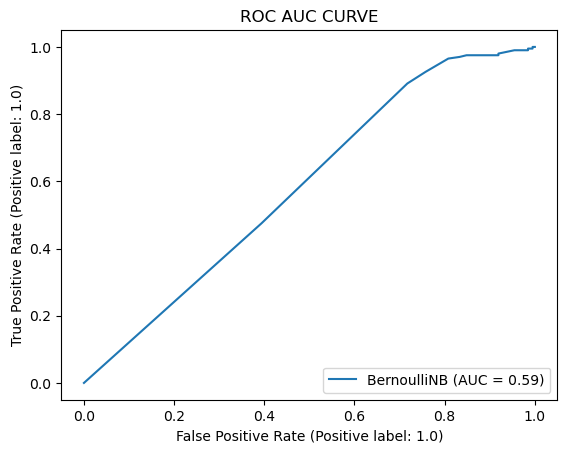





****************************** DecisionTreeClassifier ******************************
The maximum accuracy score of DecisionTreeClassifier is 0.755 is achieved at 35




Accuracy_Score:  69.25


Accuracy Score of Model  : 100.0


AUC_Score: 69.25442544254426


Cross Validation Score:  72.89999999999999


Precision Score: 69.84924623115577


Recall_Score:  68.8118811881188


Balanced Accuracy_Score:  69.25442544254426


F1 Score:  69.32668329177058


Confusion matrix: 

[[138  60]
 [ 63 139]]


Classification Report:
 
              precision    recall  f1-score   support

         0.0       0.69      0.70      0.69       198
         1.0       0.70      0.69      0.69       202

    accuracy                           0.69       400
   macro avg       0.69      0.69      0.69       400
weighted avg       0.69      0.69      0.69       400



<Figure size 500x500 with 0 Axes>

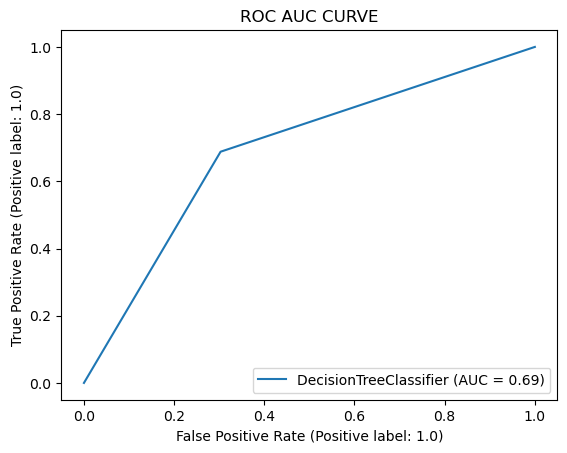





****************************** KneighborsClassifier ******************************
The maximum accuracy score of KneighborsClassifier is 0.8025 is achieved at 34




Accuracy_Score:  76.0


Accuracy Score of Model  : 83.5


AUC_Score: 75.93259325932593


Cross Validation Score:  78.20000000000002


Precision Score: 73.24561403508771


Recall_Score:  82.67326732673267


Balanced Accuracy_Score:  75.93259325932593


F1 Score:  77.67441860465117


Confusion matrix: 

[[137  61]
 [ 35 167]]


Classification Report:
 
              precision    recall  f1-score   support

         0.0       0.80      0.69      0.74       198
         1.0       0.73      0.83      0.78       202

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.76      0.76      0.76       400



<Figure size 500x500 with 0 Axes>

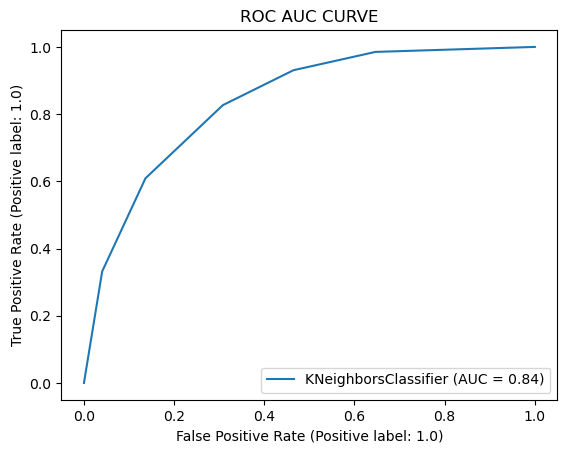





****************************** AdaBoostClassifier ******************************
The maximum accuracy score of AdaBoostClassifier is 0.7925 is achieved at 20




Accuracy_Score:  78.5


Accuracy Score of Model  : 83.66666666666667


AUC_Score: 78.4878487848785


Cross Validation Score:  76.6


Precision Score: 78.15533980582524


Recall_Score:  79.70297029702971


Balanced Accuracy_Score:  78.4878487848785


F1 Score:  78.92156862745098


Confusion matrix: 

[[153  45]
 [ 41 161]]


Classification Report:
 
              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78       198
         1.0       0.78      0.80      0.79       202

    accuracy                           0.79       400
   macro avg       0.79      0.78      0.78       400
weighted avg       0.79      0.79      0.78       400



<Figure size 500x500 with 0 Axes>

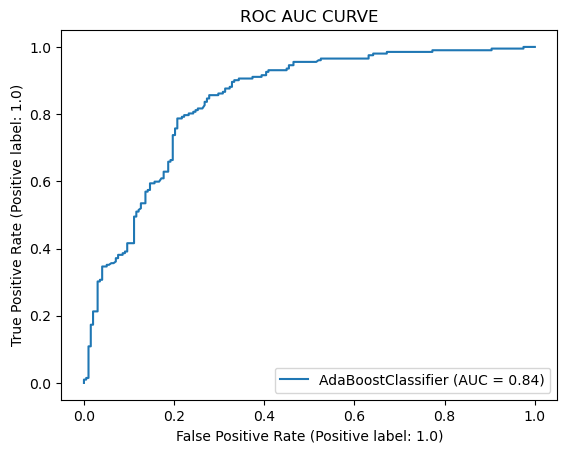





****************************** GradientBoostingClassifier ******************************
The maximum accuracy score of GradientBoostingClassifier is 0.795 is achieved at 31




Accuracy_Score:  78.75


Accuracy Score of Model  : 94.16666666666667


AUC_Score: 78.74537453745376


Cross Validation Score:  78.1


Precision Score: 78.81773399014779


Recall_Score:  79.20792079207921


Balanced Accuracy_Score:  78.74537453745376


F1 Score:  79.01234567901234


Confusion matrix: 

[[155  43]
 [ 42 160]]


Classification Report:
 
              precision    recall  f1-score   support

         0.0       0.79      0.78      0.78       198
         1.0       0.79      0.79      0.79       202

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400



<Figure size 500x500 with 0 Axes>

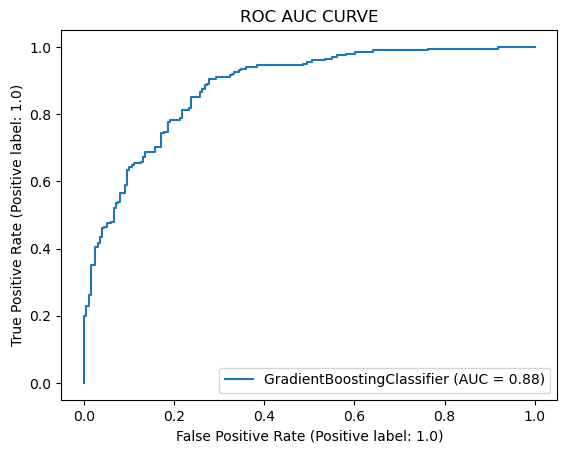





****************************** RandomForestClassifier ******************************
The maximum accuracy score of RandomForestClassifier is 0.8325 is achieved at 32




Accuracy_Score:  79.75


Accuracy Score of Model  : 100.0


AUC_Score: 79.75547554755474


Cross Validation Score:  81.4


Precision Score: 80.40201005025126


Recall_Score:  79.20792079207921


Balanced Accuracy_Score:  79.75547554755475


F1 Score:  79.8004987531172


Confusion matrix: 

[[159  39]
 [ 42 160]]


Classification Report:
 
              precision    recall  f1-score   support

         0.0       0.79      0.80      0.80       198
         1.0       0.80      0.79      0.80       202

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



<Figure size 500x500 with 0 Axes>

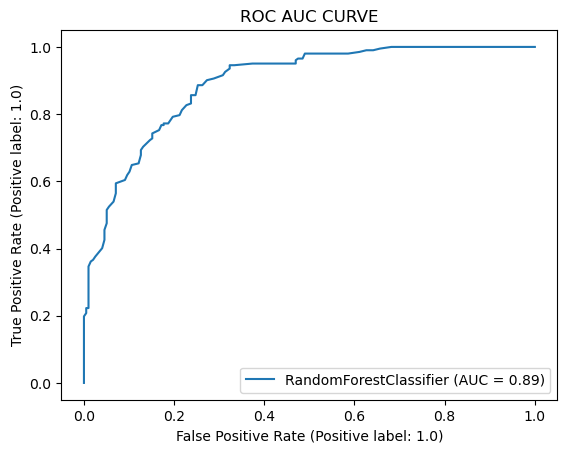





****************************** XGBClassifier ******************************
[10:00:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[10:00:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[10:00:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[10:00:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederr

<Figure size 500x500 with 0 Axes>

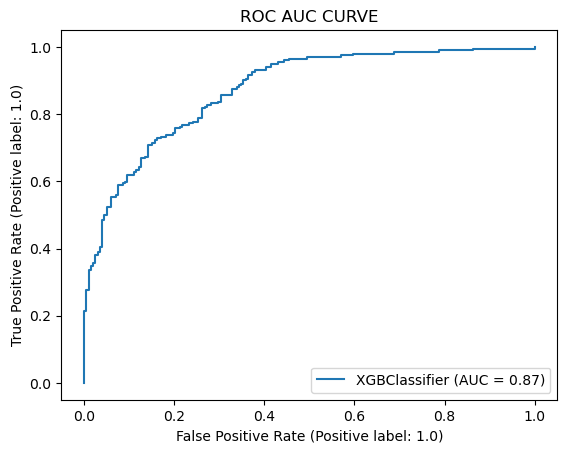

In [87]:
# Creating empty lists
Model = []
Acc_score = []
Model_score=[]
cvs = []
Precision_Score=[]
Roc_score=[]
Recall_score=[]
F1_Score=[]
Balanced_score=[]

for name,model in models:
    print("******************************",name,"******************************")
    # Determining Best Random State
    
    max_score=0
    for r_state in range (20,40):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.40)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        acc_score=accuracy_score(y_test,pred)
        if acc_score>max_score:
            max_score=acc_score
            final_r_state=r_state
    print("The maximum accuracy score of", name ,"is", max_score, "is achieved at", final_r_state)
    print("\n")
    
    #Model.append(name)
    Model.append(name)
    model.fit(x_train,y_train)
    print('\n')
    
    #print(model)
    y_pred=model.predict(x_test)
    
    # Accuracy Score
    acc_score=accuracy_score(y_test,y_pred)*100
    print('Accuracy_Score: ',acc_score)
    Acc_score.append(acc_score)
    print('\n')
    
    #trainning score
    pred_train=model.predict(x_train)
    Score=accuracy_score(y_train,pred_train)*100
    print(f"Accuracy Score of Model  : {(accuracy_score(y_train,pred_train)*100)}")
    Model_score.append(Score)
    print('\n')
    
    #roc_score
    auc_score=roc_auc_score(y_test,y_pred)*100
    print('AUC_Score:',auc_score)
    Roc_score.append(auc_score)
    print('\n')
    
    # Cross Validation Score
    cv=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()*100
    print('Cross Validation Score: ',cv)
    cvs.append(cv)
    print('\n')
    
    #Pricision Score
    print('Precision Score:', precision_score(y_test,y_pred)*100)
    pre_score=precision_score(y_test,y_pred)*100
    Precision_Score.append(pre_score)
    print('\n')
    
    # Recall Score
    recal_score=recall_score(y_test,y_pred)*100
    print('Recall_Score: ',recal_score)
    Recall_score.append(recal_score)
    print('\n')

    #Balanced Accuracy Score
    bal_score=balanced_accuracy_score(y_test,y_pred)*100
    print('Balanced Accuracy_Score: ',bal_score)
    Balanced_score.append(bal_score)
    print('\n')
    
    # f1 Score
    f1_scor=f1_score(y_test,y_pred)*100
    print('F1 Score: ',f1_scor)
    F1_Score.append(f1_scor)
    print('\n')
    
    # Confusion Matrix
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print("\n")
    
    # Classification Report
    print('Classification Report:\n ')
    print(classification_report(y_test,y_pred))
    
    #roc_curve
    plt.figure(figsize=(5,5))
    plot_roc_curve(model,x_test,y_test)
    plt.title('ROC AUC CURVE')
    plt.show()
    print('\n')
    print('\n')

In [88]:
# Displaying Scores and metrics:
Results=pd.DataFrame({'Model': Model,'Accuracy Score': Acc_score,'Dataset_score':Model_score,'Cross Validation Score':cvs,
                      'Precision':Precision_Score,'Recall_Score':Recall_score,'F1_Score':F1_Score,'Balanced_Score':Balanced_score,
                      'Roc_Score':Roc_score,}) 
Results

,Model,Accuracy Score,Dataset_score,Cross Validation Score,Precision,Recall_Score,F1_Score,Balanced_Score,Roc_Score
0,LogisticRegression,76.50,76.166667,75.9,79.347826,72.277228,75.647668,76.542654,76.542654
1,MultinomialNB,62.50,61.666667,60.7,66.666667,51.485149,58.100559,62.611261,62.611261
2,GaussianNB,74.00,74.333333,73.5,75.520833,71.782178,73.604061,74.022402,74.022402
3,Bernoulli,59.00,62.000000,60.8,55.900621,89.108911,68.702290,58.695870,58.695870
4,DecisionTreeClassifier,69.25,100.000000,72.9,69.849246,68.811881,69.326683,69.254425,69.254425
5,KneighborsClassifier,76.00,83.500000,78.2,73.245614,82.673267,77.674419,75.932593,75.932593
6,AdaBoostClassifier,78.50,83.666667,76.6,78.155340,79.702970,78.921569,78.487849,78.487849
7,GradientBoostingClassifier,78.75,94.166667,78.1,78.817734,79.207921,79.012346,78.745375,78.745375
8,RandomForestClassifier,79.75,100.000000,81.4,80.402010,79.207921,79.800499,79.755476,79.755476
9,XGBClassifier,76.50,100.000000,78.6,75.961538,78.217822,77.073171,76.482648,76.482648


### Hypertuning

In [89]:
dict1={'criterion':['gini','entropy','log_loss'],'max_features':['sqrt','log2','None'],'n_estimators':[100,200,300,400,500],
      'max_depth':[3,4,5,6,7]}

In [90]:
Gs=GridSearchCV(RF,dict1,cv=5,n_jobs=1, verbose=1)
Gs.fit(x,y)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=1)

In [91]:
Gs.best_score_

0.8029999999999999

In [92]:
Gs.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 500}

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Confusion Matrix : [[156  42]
 [ 35 167]]
Classification Report :               precision    recall  f1-score   support

         0.0       0.82      0.79      0.80       198
         1.0       0.80      0.83      0.81       202

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400

Accuracy Score of Model  : 80.75
Dataset Score : 93.66666666666667
Precision Score: 79.90430622009569
Recall_score:82.67326732673267
F1_score:81.26520681265205


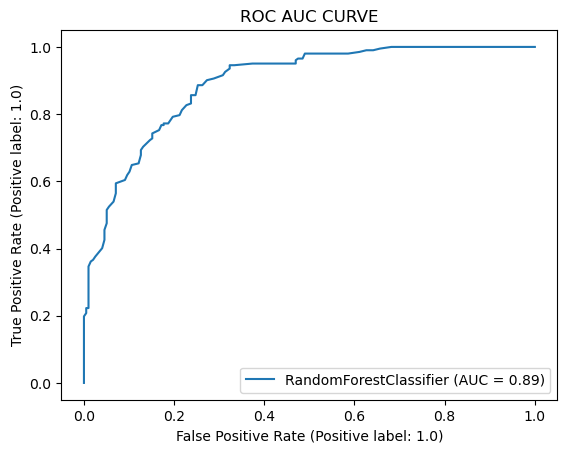

In [93]:
Rfc=RandomForestClassifier(criterion='gini',max_features='sqrt',n_estimators=500,max_depth=7,n_jobs=1, verbose=1)
Rfc.fit(x_train,y_train)
pred_test=Rfc.predict(x_test)
print(f"Confusion Matrix : {confusion_matrix(y_test,pred_test)}")
print(f"Classification Report : {classification_report(y_test,pred_test)}")
print(f"Accuracy Score of Model  : {(accuracy_score(y_test,pred_test)*100)}")  #accuracy score of testing data
print(f"Dataset Score : {(Rfc.score(x_train,y_train))*100}")    #model working with dataset
print('Precision Score:', precision_score(y_test,pred_test)*100)   #precision score for how accurate our prediction
print(f"Recall_score:{recall_score(y_test,pred_test)*100}")   #recall score
print(f"F1_score:{f1_score(y_test,pred_test)*100}")  #f1_score
plot_roc_curve(RF,x_test,y_test)   # roc currve
plt.title('ROC AUC CURVE')
plt.show()